In [1]:
def gini(array):
    """
    Compute the Gini coefficient for a given array of values.

    The Gini coefficient is a measure of income or wealth inequality that ranges from 0 to 1,
    with 0 indicating perfect equality (i.e., everyone has the same income) and 1 indicating
    perfect inequality (i.e., one person has all the income and everyone else has none).

    Parameters:
    -----------
    array : array-like
        Input array of values.

    Returns:
    --------
    float
        Gini coefficient for the input array of values.
    """
    
    # from: https://github.com/oliviaguest/gini
    #http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm 
    array = np.array(array)
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array += np.amin(array) #non-negative
    array += 0.0000001 #non-0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) 
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))



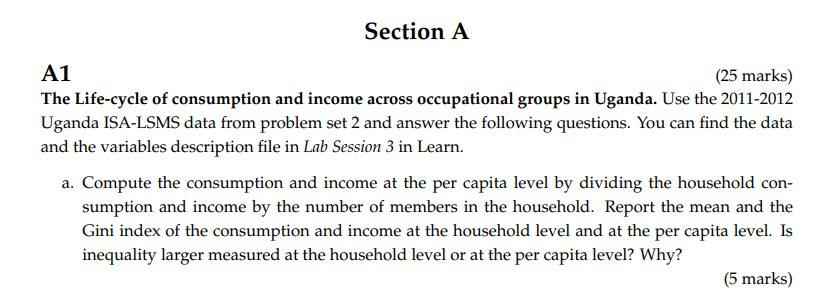

In [6]:

#setup 
#import dsata
df1 = pd.read_excel("UNPS_1112_PS2.xls")

# summarize(df1)

#compute consumption per capita 
consumption_per_capita =  df1['consumption'] / df1['familysize']
consumption_per_capita = consumption_per_capita.dropna()

# print(consumption_per_capita)
print(gini(consumption_per_capita))

0.40849839703790125


In [8]:
import numpy as np 
import pandas as pd

#setup 
#import dsata
df1 = pd.read_excel("UNPS_1112_PS2.xls")

# summarize(df1)

#compute consumption per capita 
consumption_per_capita =  df1['consumption'] / df1['familysize']
consumption_per_capita = consumption_per_capita.dropna()

#compute income per capita 
income_per_capita = df1['income'] / df1['familysize']
income_per_capita = consumption_per_capita.dropna()

#calculate the mean and the gini index of the consumption at the househod level
mean_consumption_per_capita = np.mean(df1['consumption'] / df1['familysize'])
gini_consumption_per_capita = gini(consumption_per_capita)

#calculate the mean and the gini index of the income at the househod level
mean_income_per_capita = np.mean(df1['income'] / df1['familysize'])
gini_income_per_capita = gini(income_per_capita)

# compare the Gini coefficients calculated for household consumption and income with those calculated for consumption and income per capita.
gini_income = gini(df1['income'])
gini_consumption = gini(df1['consumption'])

# Print the results
print("Mean consumption per capita:", mean_consumption_per_capita)
print("Mean income per capita:", mean_income_per_capita)
print("Gini coefficient for consumption per capita:", gini_consumption_per_capita)
print("Gini coefficient for income per capita:", gini_income_per_capita)
print("Gini coefficient for consumption ",gini_consumption)
print("Gini coefficient for income ",gini_income)


# Compare the Gini coefficients for household and per capita measures
if gini_consumption > gini_consumption_per_capita:
    print("Inequality is larger at the household level for consumption.")
else:
    print("Inequality is larger at the per capita level for consumption.")
    
if gini_income > gini_income_per_capita:
    print("Inequality is larger at the household level for income.")
else:
    print("Inequality is larger at the per capita level for income.")


Mean consumption per capita: 293.2976477013815
Mean income per capita: 300.1169471521857
Gini coefficient for consumption per capita: 0.40849839703790125
Gini coefficient for income per capita: 0.40849839703790125
Gini coefficient for consumption  0.36571709606291986
Gini coefficient for income  0.5555724110542888
Inequality is larger at the per capita level for consumption.
Inequality is larger at the household level for income.


## rephraase this and ask chatgpt 4

If the Gini coefficient for household consumption or income is higher than the Gini coefficient for consumption or income per capita, then inequality is larger at the household level. Conversely, if the Gini coefficient for consumption or income per capita is higher than the Gini coefficient for household consumption or income, then inequality is larger at the per capita level.

It's difficult to predict what the result of this comparison would be without knowing the specific data you are working with. In general, if there are large differences in household size or income within the same household, then inequality may be larger at the per capita level. Conversely, if household income and consumption are relatively evenly distributed within households, then inequality may be larger at the household level.

Therefore, it is important to examine both measures of inequality to gain a complete understanding of the distribution of consumption and income within the population.

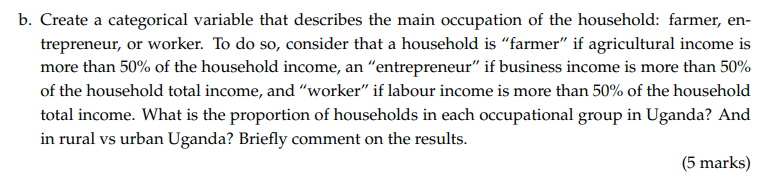


## might wanna double check the code below especially np.select 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Calculate the percentage of income from each source
df1['pct_agriculture_inc'] = df1['agriculture_inc'] / df1['income']
df1['pct_business_inc'] = df1['business_inc'] / df1['income']
df1['pct_wage_labor'] = df1['wage_labor'] / df1['income']

# Define the conditions for each occupational group
conditions = [
    (df1['pct_agriculture_inc'] > 0.5),
    (df1['pct_business_inc'] > 0.5),
    (df1['pct_wage_labor'] > 0.5)
]

# Define the values for each occupational group
values = ['farmer', 'entrepreneur', 'worker']

# Create a new column with the main occupation of the household
#The values in this new column are determined based on the conditions and values defined in the
#  "conditions" and "values" variables. Specifically, it assigns "farmer" if the proportion of 
# income from agriculture is greater than 50%, "entrepreneur" if the proportion of income from
#  business is greater than 50%, "worker" if the proportion 
# of income from wage labor is greater than 50%, and "other" if none of these conditions are met.
df1['occupation'] = np.select(conditions, values, default='other')

# Calculate the proportion of households in each occupational group
#  df1['occupation'].value_counts() counts the number of households in each occupational group,
#  and normalize=True normalizes the counts to give proportions. The resulting 
occupation_proportions = df1['occupation'].value_counts(normalize=True)



# Calculate the proportion of households in each occupational group in rural and urban areas
#It does this by filtering the DataFrame df1 to include only the rows where the 'urban' column equals 0,
# counts the number of occurrences of each occupation in the 'occupation' column and normalizes the counts t
# to get the proportions.
rural_occupation_proportions = df1[df1['urban'] == 0]['occupation'].value_counts(normalize=True)
urban_occupation_proportions = df1[df1['urban'] == 1]['occupation'].value_counts(normalize=True)

print('general occupation proportions:\n',occupation_proportions )
print("\n rural occupation proportions:\n",rural_occupation_proportions)
print("\n urban occupation proportions:\n",urban_occupation_proportions)

general occupation proportions:
 farmer          0.484883
worker          0.173364
entrepreneur    0.171068
other           0.170685
Name: occupation, dtype: float64

 rural occupation proportions:
 farmer          0.559338
other           0.157447
entrepreneur    0.146099
worker          0.137116
Name: occupation, dtype: float64

 urban occupation proportions:
 worker          0.327309
entrepreneur    0.277108
other           0.226908
farmer          0.168675
Name: occupation, dtype: float64


## Comment on the results




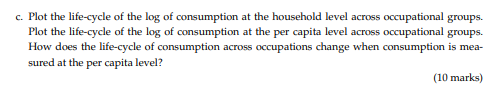

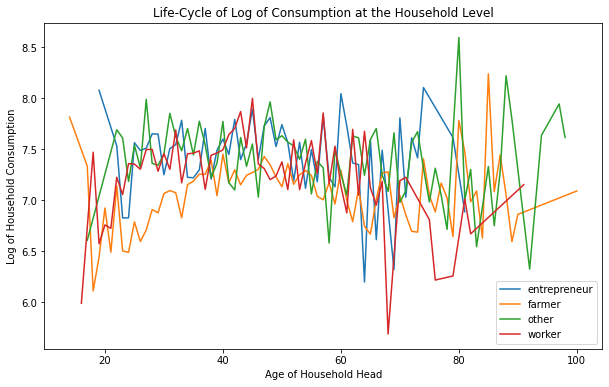

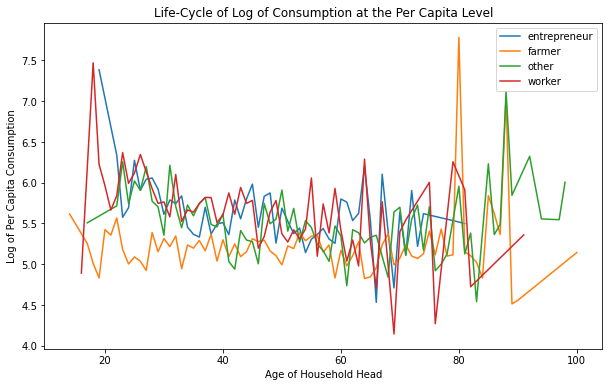

In [38]:
# Create columns for the log of household consumption and the log of per capita consumption
df1['log_consumption'] = np.log(df1['consumption'])
df1['log_consumption_per_capita'] = np.log(df1['consumption'] / df1['familysize'])

# Group the data by occupation and age of the household head
grouped_data = df1.groupby(['occupation', 'head_age'])

# Calculate the mean of the log of household consumption and the log of per capita consumption for each group
mean_log_consumption = grouped_data['log_consumption'].mean().reset_index()
mean_log_consumption_per_capita = grouped_data['log_consumption_per_capita'].mean().reset_index()

# Plot the life-cycle of consumption at the household level across occupational groups
plt.figure(figsize=(10, 6))
for occupation in mean_log_consumption['occupation'].unique():
    occupation_data = mean_log_consumption[mean_log_consumption['occupation'] == occupation]
    plt.plot(occupation_data['head_age'], occupation_data['log_consumption'], label=occupation)
plt.xlabel('Age of Household Head')
plt.ylabel('Log of Household Consumption')
plt.legend()
plt.title('Life-Cycle of Log of Consumption at the Household Level')
plt.show()

# Plot the life-cycle of consumption at the per capita level across occupational groups
plt.figure(figsize=(10, 6))
for occupation in mean_log_consumption_per_capita['occupation'].unique():
    occupation_data = mean_log_consumption_per_capita[mean_log_consumption_per_capita['occupation'] == occupation]
    plt.plot(occupation_data['head_age'], occupation_data['log_consumption_per_capita'], label=occupation)
plt.xlabel('Age of Household Head')
plt.ylabel('Log of Per Capita Consumption')
plt.legend()
plt.title('Life-Cycle of Log of Consumption at the Per Capita Level')
plt.show()

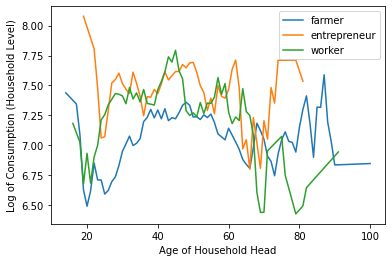

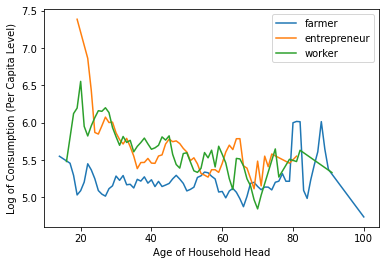

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Code to read and preprocess the data (df1) goes here

# Create a new column with the log of consumption at the household level and per capita level
df1['log_consumption'] = np.log(df1['consumption'])
df1['log_consumption_per_capita'] = np.log(df1['consumption'] / df1['familysize'])

# Group the data by occupation and age of the household head, and calculate the mean log consumption in each group
grouped_data = df1.groupby(['occupation', 'head_age']).mean()[['log_consumption', 'log_consumption_per_capita']]

# Apply a rolling mean with a window size of 3 to the grouped data
rolling_mean_window = 3
grouped_data_rolling_mean = grouped_data.rolling(window=rolling_mean_window, min_periods=1).mean()

# Reset the index to make it easier to plot the data
grouped_data_rolling_mean.reset_index(inplace=True)

# Plot the life-cycle of the log of consumption at the household level across occupational groups
for occupation in ['farmer', 'entrepreneur', 'worker']:
    plt.plot(grouped_data_rolling_mean[grouped_data_rolling_mean['occupation'] == occupation]['head_age'],
             grouped_data_rolling_mean[grouped_data_rolling_mean['occupation'] == occupation]['log_consumption'],
             label=occupation)

plt.xlabel('Age of Household Head')
plt.ylabel('Log of Consumption (Household Level)')
plt.legend()
plt.show()

# Plot the life-cycle of the log of consumption at the per capita level across occupational groups
for occupation in ['farmer', 'entrepreneur', 'worker']:
    plt.plot(grouped_data_rolling_mean[grouped_data_rolling_mean['occupation'] == occupation]['head_age'],
             grouped_data_rolling_mean[grouped_data_rolling_mean['occupation'] == occupation]['log_consumption_per_capita'],
             label=occupation)

plt.xlabel('Age of Household Head')
plt.ylabel('Log of Consumption (Per Capita Level)')
plt.legend()
plt.show()


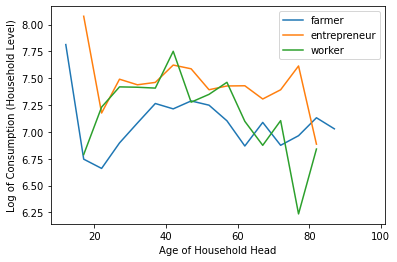

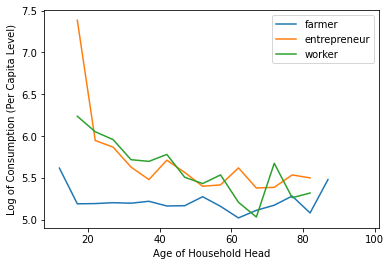

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Code to read and preprocess the data (df1) goes here

# Create a new column with the log of consumption at the household level and per capita level
df1['log_consumption'] = np.log(df1['consumption'])
df1['log_consumption_per_capita'] = np.log(df1['consumption'] / df1['familysize'])

# Define the bins and their labels
bins = np.arange(0, df1['head_age'].max() + 10, 5)
bin_labels = (bins[:-1] + bins[1:]) // 2

# Assign each age value to a bin
df1['age_bin'] = pd.cut(df1['head_age'], bins, labels=bin_labels)

# Group the data by occupation and age bin, and calculate the mean log consumption in each group
grouped_data = df1.groupby(['occupation', 'age_bin']).mean()[['log_consumption', 'log_consumption_per_capita']]

# Reset the index to make it easier to plot the data
grouped_data.reset_index(inplace=True)

# Plot the life-cycle of the log of consumption at the household level across occupational groups
for occupation in ['farmer', 'entrepreneur', 'worker']:
    plt.plot(grouped_data[grouped_data['occupation'] == occupation]['age_bin'],
             grouped_data[grouped_data['occupation'] == occupation]['log_consumption'],
             label=occupation)

plt.xlabel('Age of Household Head')
plt.ylabel('Log of Consumption (Household Level)')
plt.legend()
plt.show()

# Plot the life-cycle of the log of consumption at the per capita level across occupational groups
for occupation in ['farmer', 'entrepreneur', 'worker']:
    plt.plot(grouped_data[grouped_data['occupation'] == occupation]['age_bin'],
             grouped_data[grouped_data['occupation'] == occupation]['log_consumption_per_capita'],
             label=occupation)

plt.xlabel('Age of Household Head')
plt.ylabel('Log of Consumption (Per Capita Level)')
plt.legend()
plt.show()


## write comments here 
The differences between the two plots can be attributed to the varying family sizes across occupations and age groups

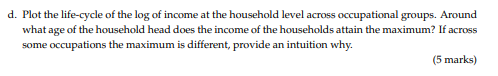

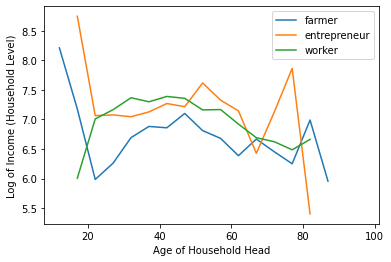

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Code to read and preprocess the data (df1) goes here

# Create a new column with the log of income at the household level
df1['log_income'] = np.log(df1['income'])

# Define the bins and their labels
bins = np.arange(0, df1['head_age'].max() + 10, 5)
bin_labels = (bins[:-1] + bins[1:]) // 2

# Assign each age value to a bin
df1['age_bin'] = pd.cut(df1['head_age'], bins, labels=bin_labels)

# Group the data by occupation and age bin, and calculate the mean log income in each group
grouped_data = df1.groupby(['occupation', 'age_bin']).mean()[['log_income']]

# Reset the index to make it easier to plot the data
grouped_data.reset_index(inplace=True)

# Plot the life-cycle of the log of income at the household level across occupational groups
for occupation in ['farmer', 'entrepreneur', 'worker']:
    plt.plot(grouped_data[grouped_data['occupation'] == occupation]['age_bin'],
             grouped_data[grouped_data['occupation'] == occupation]['log_income'],
             label=occupation)

plt.xlabel('Age of Household Head')
plt.ylabel('Log of Income (Household Level)')
plt.legend()
plt.show()

#After plotting the life-cycle of the log of income, you can inspect the plot visually to see at what age the income
#  of the households attains the maximum. It's also possible to determine the maximum programmatically.


In [46]:
# Find the age bin with the maximum log income for each occupation
max_income_age_bins = grouped_data.groupby('occupation')['log_income'].idxmax()

# Print the results
for occupation in max_income_age_bins.index:
    age_bin = grouped_data.loc[max_income_age_bins[occupation], 'age_bin']
    print(f"The maximum income for {occupation} households is attained at the age of {age_bin}.")


The maximum income for entrepreneur households is attained at the age of 17.0.
The maximum income for farmer households is attained at the age of 12.0.
The maximum income for other households is attained at the age of 47.0.
The maximum income for worker households is attained at the age of 42.0.


Different occupations may have different maximum income ages due to factors such as the nature of the work, skills required, experience, or physical demands. For example, workers may reach their peak income earlier due to the physical nature of their jobs, while entrepreneurs might reach their peak income later as they gain more experience and grow their businesses.






# A2

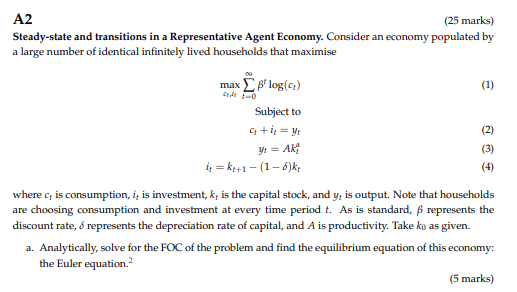

First, substitute constraint  we get:
\begin{align*}
c_t = A k_t^\alpha - k_{t+1} + (1-\delta)k_t
\end{align*}
Now substitute this into the Lagrangian:
\begin{align*}
L = \sum_{t=0}^{\infty} \left[\beta^t \log(c_t) - \lambda_t (A k_t^\alpha - k_{t+1} + (1-\delta)k_t) \right]
\end{align*}


To find the FOCs, we need to differentiate L with respect to $c_t$,  and $k_{t+1}$, and set the derivatives equal to zero:
FOC wrt $c_t$
\begin{align*}
\frac{\partial L}{\partial c_t} &= \beta^t \left(\frac{1}{c_t}\right) - \lambda_t = 0, \
\end{align*}

FOC w.r.t $k_{t+1}$
\begin{align*}
\frac{\partial L}{\partial k_{t+1}} &= \lambda_{t+1}[\alpha A k_{t+1}^{\alpha-1} + 1-\delta]- \lambda_t = 0
\end{align*}

FOC w.r.t $k_t$

$$\frac{\partial L}{\partial k_t} = \lambda_t [\alpha A k_t^{\alpha-1} - (1-\delta)] - \beta^{t-1} \lambda_{t-1} = 0$$

Now, we can substitute $λ_t$ and $λ_{t-1}$ from the first FOC (with respect to $c_t$) into the FOC w.r.t $k_{t}$:

$$\frac{\beta^t}{c_t} [\alpha A k_t^{\alpha-1} - (1-\delta)] = \frac{\beta^{t-1}}{c_{t-1}}$$

Rearranging terms, we get the Euler equation:

$$\frac{c_t}{c_{t-1}} = \beta [\alpha A k_t^{\alpha-1} + 1 - \delta]$$







The Euler equation shows the relationship between consumption in the current period and consumption in the previous period, given the capital stock and the parameters of the model. This equation represents the equilibrium condition in this representative agent economy.

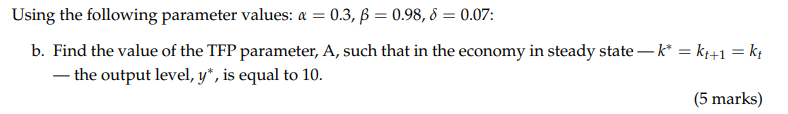

In [60]:
# TFP : total factor productivity 
# Y = A K^{\alpha} L^{\beta}
import numpy as np
from scipy.optimize import fsolve

# Parameter values
alpha = 0.3
beta = 0.98
delta = 0.07
y_star = 10

# Steady-state capital equation (k* = ((alpha*A)/(delta + 1 - beta))^(1/(1-alpha)))
def find_k_star(A):
    return ((alpha * A) / (delta + 1 - beta))**(1 / (1 - alpha))

# Function to find A given y_star and k_star
def equation(A):
    k_star = find_k_star(A)
    y_star_calculated = A * k_star**alpha
    return y_star_calculated - y_star

# Solve for A
A_solution = fsolve(equation, 1)  # 1 is an initial guess for A
print(f"The value of the TFP parameter, A, is: {A_solution[0]}")




The value of the TFP parameter, A, is: 3.4924996914343964


In [66]:
from scipy.optimize import fsolve

alpha = 0.3
beta = 0.98
delta = 0.07

# Define the Euler equation
def euler_equation(k_star, A):
    return beta * (alpha * A * k_star**(alpha - 1) + 1 - delta) - 1

# Define the steady-state output equation
def output_equation(k_star, A, y_star=10):
    return y_star - A * k_star**alpha

# Define a function to solve for A and k_star simultaneously
def equations(variables):
    k_star, A = variables
    eq1 = euler_equation(k_star, A)
    eq2 = output_equation(k_star, A)
    return (eq1, eq2)

# Solve for A and k_star
k_star_init, A_init = 1, 1
k_star_solution, A_solution = fsolve(equations, (k_star_init, A_init))

print(f"k_star: {k_star_solution}")
print(f"A: {A_solution}")

k_star: 33.18284424493497
A: 3.497243868604733


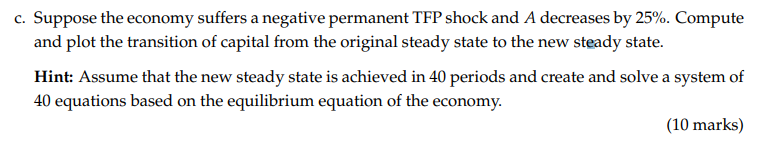

In [64]:
import matplotlib.pyplot as plt

# Compute the new TFP parameter after the 25% decrease
A_new = A_solution[0] * 0.75

# Find the new steady-state capital level
k_star_new = find_k_star(A_new)

# Number of periods to reach the new steady state
num_periods = 40

# Euler equation for the capital transition
def euler_equation(k, A, k_next, A_next):
    return beta * (A_next * alpha * k_next**(alpha - 1) + 1 - delta) - 1 / (A * k**alpha - k_next + (1 - delta) * k)

# Solve the system of 40 equations for the capital transition
k_transition = np.zeros(num_periods)
k_transition[0] = find_k_star(A_solution[0])  # Start with the original steady-state capital level

#solving the Euler equation for each period in the transition.
#
for t in range(1, num_periods):
    #solves the Euler equation for the next period's capital (k_next) at each step of the iteration, 
    # given the current capital level (k_transition[t - 1]), 
    # the original TFP parameter A (A_solution[0]), and the new TFP parameter A (A_new).
    k_transition[t] = fsolve(lambda k_next: euler_equation(k_transition[t - 1], A_solution[0], k_next, A_new), k_transition[t - 1])

# Plot the transition of capital
plt.figure(figsize=(10, 6))
plt.plot(range(num_periods), k_transition, label='Capital Transition')
plt.axhline(y=k_star_new, color='r', linestyle='--', label='New Initial Steady-State Capital')
plt.xlabel('Time Periods')
plt.ylabel('Capital')
plt.title('Transition of Capital from the Original Steady State to the New Steady State')
plt.legend()
plt.show()


IndexError: invalid index to scalar variable.

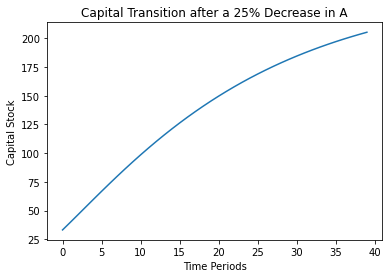

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
alpha = 0.3
beta = 0.98
delta = 0.07
num_periods = 40

# Find the steady state capital stock
def steady_state(k, A):
    return beta * (alpha * A * k**(alpha - 1) + 1 - delta) - 1

A_solution = 10 / k_star_solution**alpha
k_star_solution = fsolve(lambda k: steady_state(k, A_solution), 1)

# New TFP after the shock
A_new = A_solution * 0.75

# Find the new steady state capital stock
k_star_new = fsolve(lambda k: steady_state(k, A_new), 1)

# Euler equation for the capital transition
def euler_equation(k, A, k_next, A_next):
    return beta * (alpha * A_next * k_next**(alpha - 1) + 1 - delta) - 1 / (A * k**alpha - k_next + (1 - delta) * k)

# Initialize the capital transition array
k_transition = np.empty(num_periods)
k_transition[0] = k_star_solution

# Compute the capital transition
for t in range(1, num_periods):
    k_transition[t] = fsolve(lambda k_next: euler_equation(k_transition[t - 1], A_solution, k_next, A_new), k_transition[t - 1])

# Plot the capital transition
plt.plot(range(num_periods), k_transition)
plt.xlabel('Time Periods')
plt.ylabel('Capital Stock')
plt.title('Capital Transition after a 25% Decrease in A')
plt.show()


In [53]:
# Steady-state output level
y_star_new = A_new * k_star_new**alpha

# Steady-state investment level
i_star_new = delta * k_star_new

# Steady-state consumption level
c_star_new = y_star_new - i_star_new

# Print the steady-state levels
print("New steady-state capital level (k_star_new):", k_star_new)
print("New steady-state output level (y_star_new):", y_star_new)
print("New steady-state investment level (i_star_new):", i_star_new)
print("New steady-state consumption level (c_star_new):", c_star_new)


New steady-state capital level (k_star_new): 22.10013038109031
New steady-state output level (y_star_new): 6.630039114327098
New steady-state investment level (i_star_new): 1.5470091266763217
New steady-state consumption level (c_star_new): 5.083029987650776
